<a href="https://colab.research.google.com/github/Praveen5612/ML_Algorithams/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Wholesale customers data.csv')
data.shape

(440, 8)

In [ ]:
data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df = data.drop(['Channel', 'Region'], axis=1)

In [ ]:
df.shape

(440, 6)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

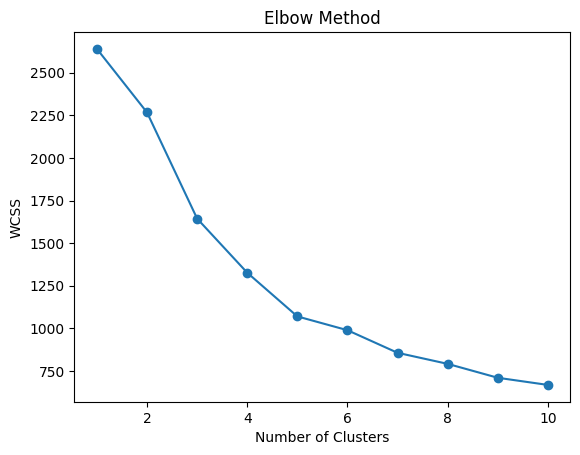

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()



In [ ]:
k = 6  # or the value from elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_


In [ ]:
df['Cluster'] = labels

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2762464573058837


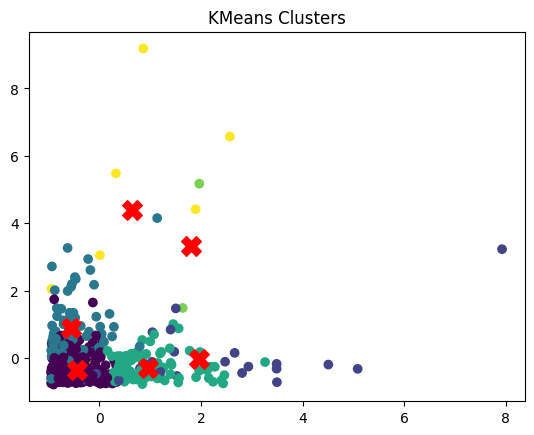

In [ ]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("KMeans Clusters")
plt.show()

In [ ]:
# View all rows in Cluster 0
display(df[df['Cluster'] == 0])

# Group by cluster and calculate statistics (optional)
display(df.groupby('Cluster').mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
5,9413,8259,5126,666,1795,1451,0
...,...,...,...,...,...,...,...
430,3097,4230,16483,575,241,2080,0
431,8533,5506,5160,13486,1377,1498,0
433,1982,3218,1493,1541,356,1449,0
438,10290,1981,2232,1038,168,2125,0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,6431.306383,3298.510638,4185.655319,2201.978723,1231.331915,985.365957
1,36722.230769,5642.692308,6519.538462,12271.500000,1043.500000,3618.000000
2,5055.833333,12298.948718,18733.897436,1610.371795,8361.448718,1815.705128
3,24020.195652,3715.836957,4972.847826,2980.021739,1132.032609,1438.043478
4,32717.000000,16784.000000,13626.000000,60869.000000,1272.000000,5609.000000
5,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857
6,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000


In [ ]:
cluster_stats = df.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum()
cluster_stats['TotalAvgSpend'] = cluster_stats.sum(axis=1)

# 8. Sort clusters by total average spend
sorted_clusters = cluster_stats.sort_values(by='TotalAvgSpend', ascending=False)
display(sorted_clusters)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,TotalAvgSpend
Cluster,,,,,,,
0,1511357,775150,983629,517465,289363,231561,4308525
2,394355,959318,1461244,125609,652193,141625,3734344
3,2209858,341857,457502,274162,104147,132300,3519826
1,954778,146710,169508,319059,27131,94068,1711254
5,140219,266588,392883,17952,193512,17837,1028991
6,36847,43950,20170,36534,239,47943,185683
4,32717,16784,13626,60869,1272,5609,130877
